In [ ]:
import pandas as pd
import io
from google.colab import files
from sklearn.manifold import Isomap
from sklearn.preprocessing import MinMaxScaler


import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
uploaded = files.upload()

Saving crabs.csv to crabs.csv


In [ ]:
crabs_data = pd.read_csv('crabs.csv') # crabs_data is dataframe
#Rename the columns
crabs_data = crabs_data.rename(columns={'sp':'species','FL':'Frontal lobe', 'RW':'Rear Width','CL':'Carapace Midline', 'CW':'Maximum Width','BD':'Body depth'})
#Rename the items from columns species/sex
crabs_data['species'] = crabs_data['species'].map({'B':'Blue','O':'Orange'})
crabs_data['sex'] = crabs_data['sex'].map({'M':'Male','F':'Female'})

In [ ]:
crabs_data.describe()

,index,Frontal lobe,Rear Width,Carapace Midline,Maximum Width,Body depth
count,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000
mean,25.500000,15.583000,12.73850,32.105500,36.414500,14.030500
std,14.467083,3.495325,2.57334,7.118983,7.871955,3.424772
min,1.000000,7.200000,6.50000,14.700000,17.100000,6.100000
25%,13.000000,12.900000,11.00000,27.275000,31.500000,11.400000
50%,25.500000,15.550000,12.80000,32.100000,36.800000,13.900000
75%,38.000000,18.050000,14.30000,37.225000,42.000000,16.600000
max,50.000000,23.100000,20.20000,47.600000,54.600000,21.600000


In [ ]:
crabs_data['class'] = crabs_data.species + crabs_data.sex
data_columns = ['Frontal lobe','Rear Width','Carapace Midline','Maximum Width','Body depth']

In [ ]:
crabs_min_max = crabs_data.copy()
crabs_min_max[data_columns] = MinMaxScaler().fit_transform(crabs_data[data_columns])



In [ ]:
crabs_min_max.head()

,species,sex,index,Frontal lobe,Rear Width,Carapace Midline,Maximum Width,Body depth,class,ISO1,ISO2
0,Blue,Male,1,0.056604,0.014599,0.042553,0.050667,0.058065,BlueMale,1.091359,0.008030
1,Blue,Male,2,0.100629,0.087591,0.103343,0.098667,0.083871,BlueMale,0.974560,0.004326
2,Blue,Male,3,0.125786,0.094891,0.130699,0.141333,0.103226,BlueMale,0.927329,0.024731
3,Blue,Male,4,0.150943,0.102190,0.164134,0.160000,0.135484,BlueMale,0.881710,-0.010955
4,Blue,Male,5,0.163522,0.109489,0.170213,0.157333,0.135484,BlueMale,0.872720,-0.028483


<Axes: xlabel='ISO1', ylabel='ISO2'>

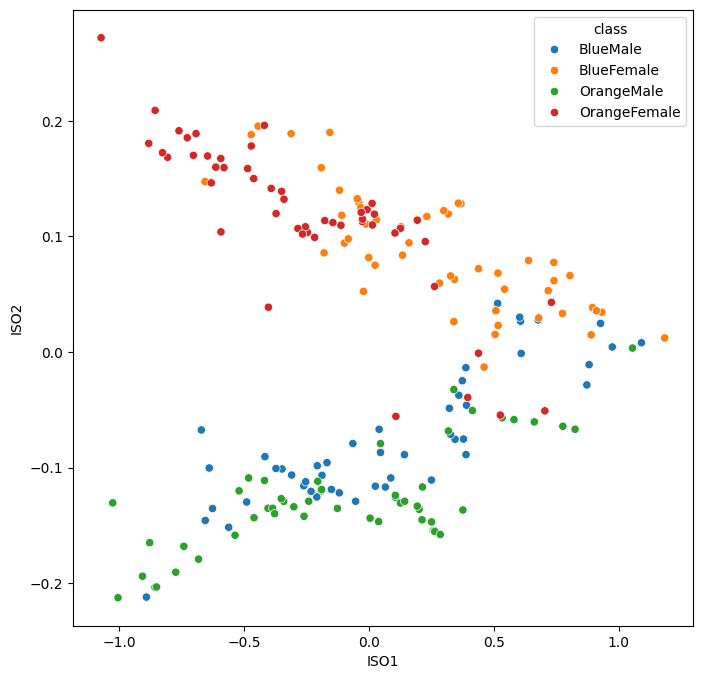

In [ ]:
isomap = Isomap(n_components=2, n_neighbors=10)
crabs_isomap = isomap.fit_transform(crabs_min_max[data_columns])

crabs_min_max[['ISO1','ISO2',]] = crabs_isomap

fig = plt.figure(figsize=(8,8))
sns.scatterplot(x='ISO1', y='ISO2', hue='class', data=crabs_min_max)